In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df_loan_pred = pd.read_csv(url)
df_loan_pred.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df_loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [3]:
df_loan_pred.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df_loan_pred.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
x_categories = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for category in x_categories:
    df_loan_pred[category] = df_loan_pred[category].astype('category')



In [6]:
df_loan_pred.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null object
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null object
dtypes: category(6), float64(3), int64(1), object(3)
memory usage: 37.8+ KB


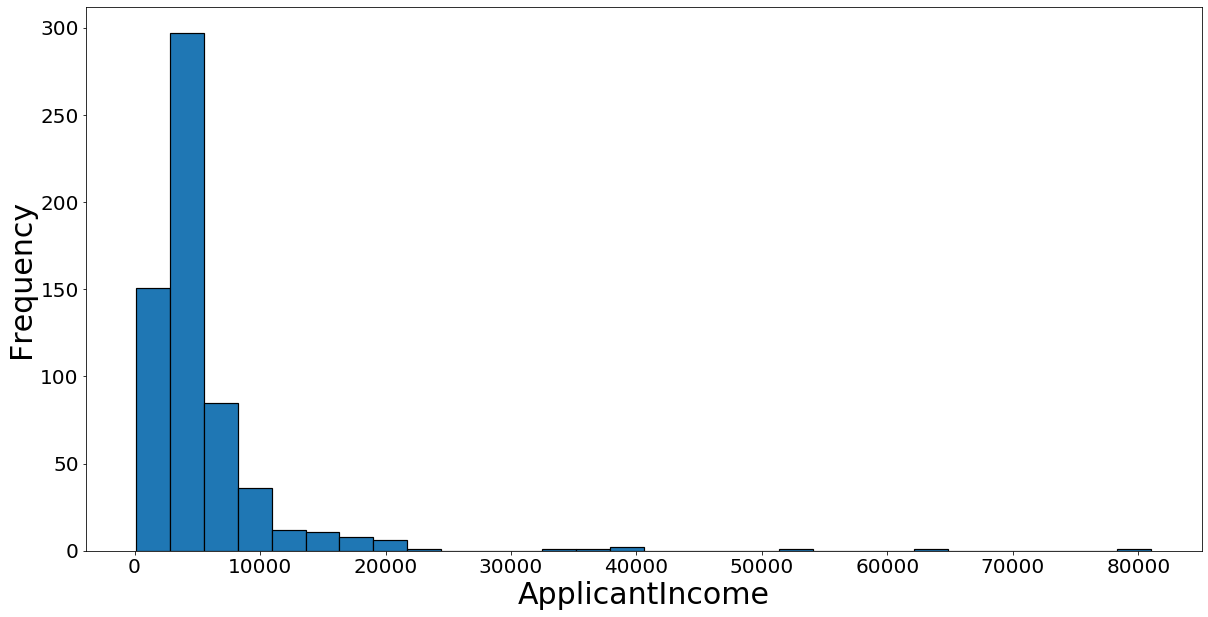

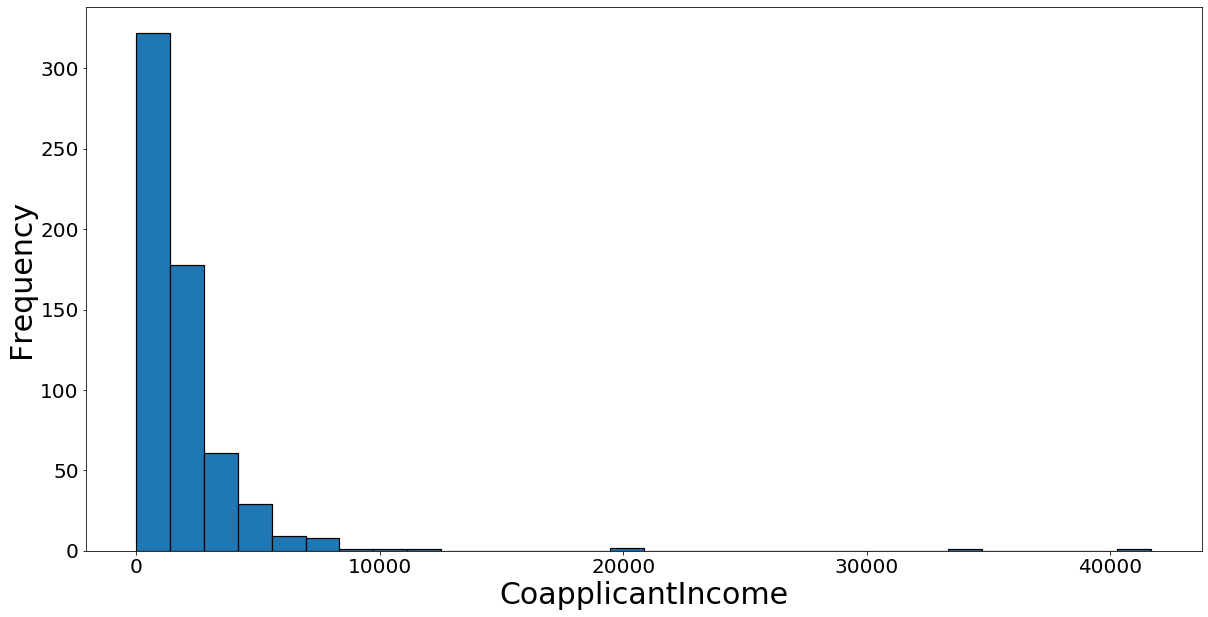

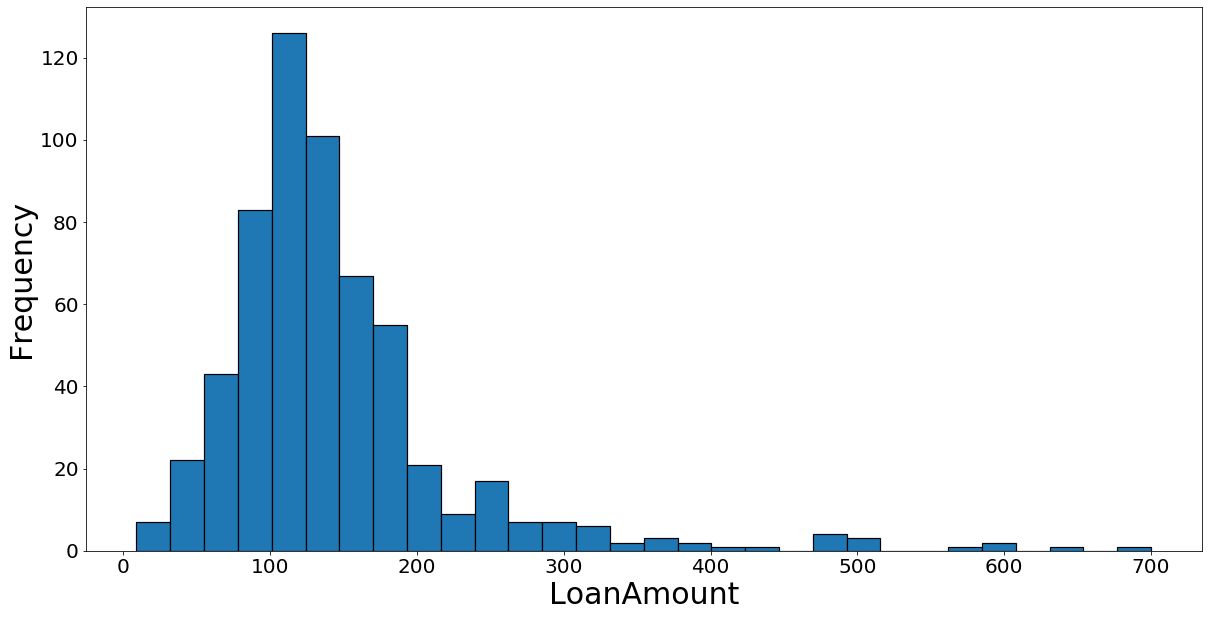

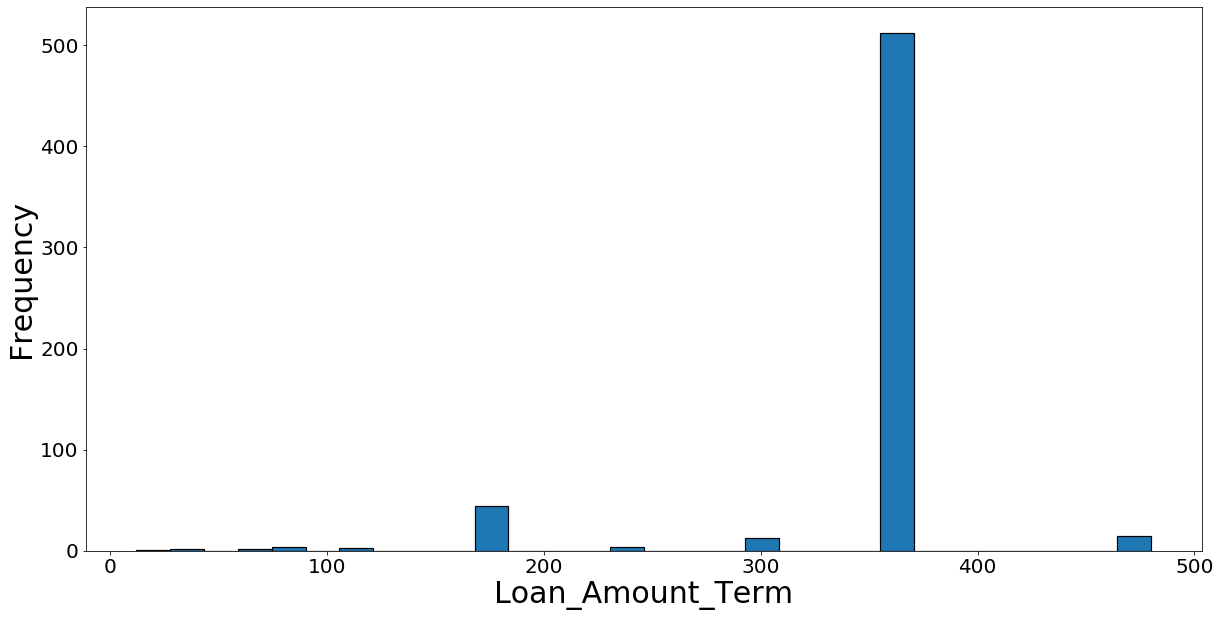

In [8]:
numeric_categories = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for element in numeric_categories:
    x = df_loan_pred[element]
    x.plot(kind='hist', bins = 30, fontsize = 20, figsize= (20,10), edgecolor='black', linewidth=1.2)
    plt.xlabel(element, fontsize=30)
    plt.ylabel('Frequency', fontsize=30)
    plt.show()

In [9]:
#Applicant Income, Co-applicant Income, Loan amount are right skewed
#Let's combine Applicant Income and Co-applicant Income to total_income
total_income = df_loan_pred['ApplicantIncome'] + df_loan_pred['CoapplicantIncome']


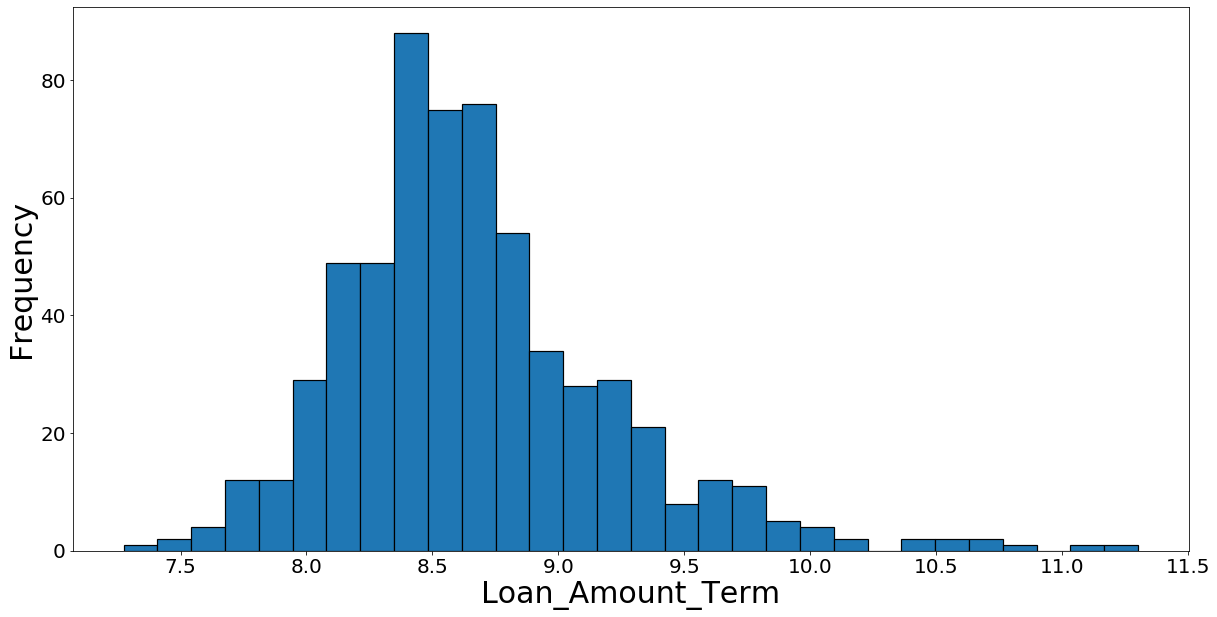

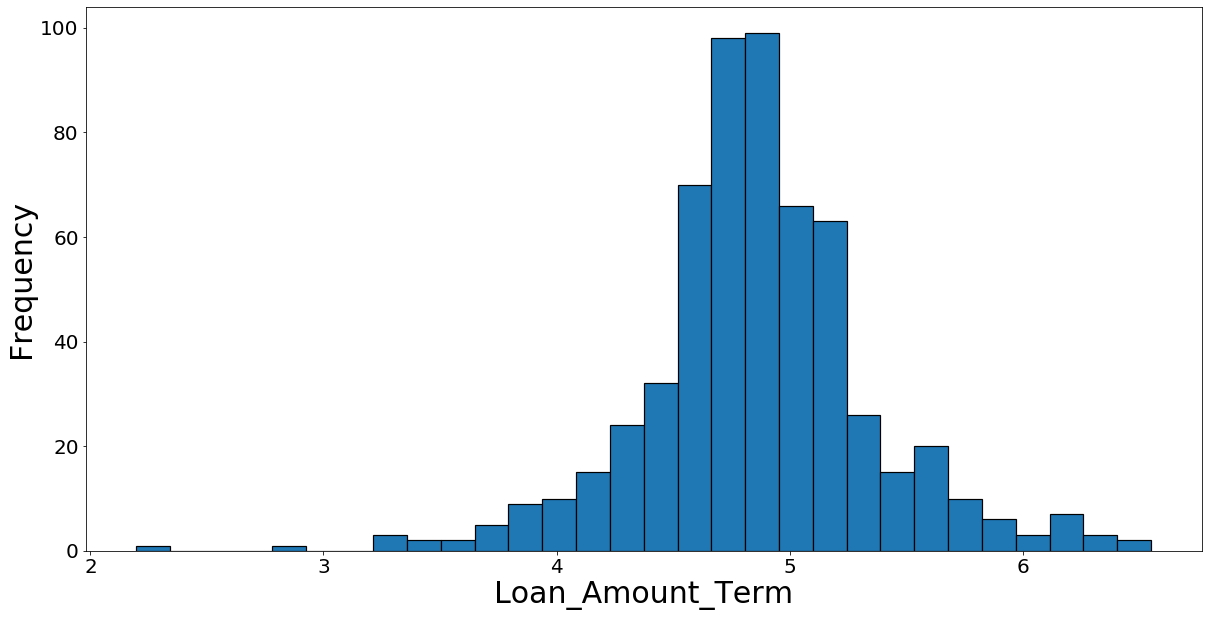

In [10]:
#Log transforming total income & loan amount to normalize
import numpy as np
df_loan_pred['total_income_log'] = np.log(total_income)
df_loan_pred['LoanAmount_log'] = np.log(df_loan_pred['LoanAmount'])

df_loan_pred['total_income_log'].plot(kind='hist', bins = 30, fontsize = 20, figsize= (20,10), edgecolor='black', linewidth=1.2)
plt.xlabel(element, fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.show()

df_loan_pred['LoanAmount_log'].plot(kind='hist', bins = 30, fontsize = 20, figsize= (20,10), edgecolor='black', linewidth=1.2)
plt.xlabel(element, fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.show()

In [11]:
#Dropping useless columns
df_loan_pred.drop(['Loan_ID', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)

In [12]:
#readying dependents to be more readable in (get dummies)
df_loan_pred['Dependents'].replace('0', 'none', inplace=True)
df_loan_pred['Dependents'].replace('1', 'one', inplace=True)
df_loan_pred['Dependents'].replace('3+', 'three+', inplace=True)

In [13]:
df_loan_pred

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income_log,LoanAmount_log
0,Male,No,none,Graduate,No,1.0,Urban,Y,8.674026,NaN
1,Male,Yes,one,Graduate,No,1.0,Rural,N,8.714568,4.852030
2,Male,Yes,none,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655
3,Male,Yes,none,Not Graduate,No,1.0,Urban,Y,8.505323,4.787492
4,Male,No,none,Graduate,No,1.0,Urban,Y,8.699515,4.948760
5,Male,Yes,2,Graduate,Yes,1.0,Urban,Y,9.170872,5.587249
6,Male,Yes,none,Not Graduate,No,1.0,Urban,Y,8.255569,4.553877
7,Male,Yes,three+,Graduate,No,0.0,Semiurban,N,8.619750,5.062595
8,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.618305,5.123964
9,Male,Yes,one,Graduate,No,1.0,Semiurban,N,10.077819,5.855072


In [14]:
#Converting data to dummies for ML algorithms to be able to process
df_dummies = pd.get_dummies(df_loan_pred, columns = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [15]:
df_dummies.Married.replace(('Yes', 'No'), (1,0), inplace=True)
df_dummies.Loan_Status.replace(('Y', 'N'), (1,0), inplace=True)
df_dummies.head()

,Married,Credit_History,Loan_Status,total_income_log,LoanAmount_log,Gender_Female,Gender_Male,Dependents_2,Dependents_none,Dependents_one,Dependents_three+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1,8.674026,NaN,0,1,0,1,0,0,1,0,1,0,0,0,1
1,1.0,1.0,0,8.714568,4.852030,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,1.0,1,8.006368,4.189655,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,1.0,1,8.505323,4.787492,0,1,0,1,0,0,0,1,1,0,0,0,1
4,0.0,1.0,1,8.699515,4.948760,0,1,0,1,0,0,1,0,1,0,0,0,1


In [16]:
#Handling missing data
df_dummies['total_income_log'].fillna(df_dummies['total_income_log'].mean(), inplace=True)
df_dummies['LoanAmount_log'].fillna(df_dummies['LoanAmount_log'].mean(), inplace=True)
df_dummies['Credit_History'].fillna(df_dummies['Credit_History'].value_counts().index[0], inplace=True)
df_dummies['Married'].fillna(df_dummies['Married'].value_counts().index[0], inplace=True)
df_dummies['Credit_History'] = df_dummies['Credit_History'].astype('float64')
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
Married                    614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
total_income_log           614 non-null float64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_none            614 non-null uint8
Dependents_one             614 non-null uint8
Dependents_three+          614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(4), int64(1), uint8(13)
memory usage: 31.9 

In [17]:
df_dummies.isnull().sum()

Married                    0
Credit_History             0
Loan_Status                0
total_income_log           0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Dependents_2               0
Dependents_none            0
Dependents_one             0
Dependents_three+          0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [18]:
x = df_dummies.drop('Loan_Status', axis=1).values
y = df_dummies['Loan_Status'].values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1, stratify=y)

In [20]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 1,
    'verbose': 0
}
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(**rf_params)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.801938 (0.061540)
LDA: 0.804264 (0.060625)
KNN: 0.755260 (0.054198)
CART: 0.680842 (0.059921)
NB: 0.780676 (0.057303)
SVM: 0.806589 (0.062268)
RF: 0.801938 (0.059757)


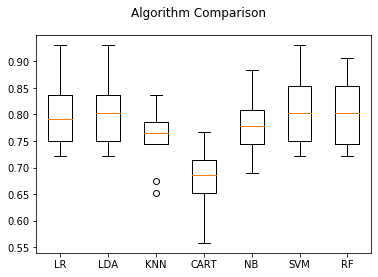

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
#Support Vector Model is giving more predicting result and plotting AUC for this model.
from sklearn.model_selection import GridSearchCV
svm = SVC(gamma='auto')

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression()

svm_cv = GridSearchCV(svm, param_grid, cv=5)

svm_cv = svm.fit(x_train,y_train)
y_pred = svm_cv.predict(x_test)
svm_cv

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

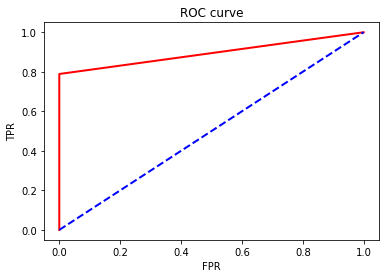

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
##Computing false and true positive rates
fpr, tpr,_=roc_curve(svm_cv.predict(x_test),y_test,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [30]:
roc_auc_score(svm_cv.predict(x_test),y_test)

0.8944099378881988